<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/ML_infrared_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [6]:
# Muat dataset
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/Infrared.csv"
data = pd.read_csv(url)

# Periksa missing values untuk menganani KNeighborsRegressor does not accept missing values encoded as NaN natively.
print("Missing values per column:")
print(data.isna().sum())

# Pisahkan fitur dan target
X = data.drop('aveOralM', axis=1)
y = data['aveOralM']

# Identifikasi kolom numerik dan kategorikal
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

Missing values per column:
Gender         0
Age            0
Ethnicity      0
T_atm          0
Humidity       0
Distance       2
T_offset1      0
Max1R13_1      0
Max1L13_1      0
aveAllR13_1    0
aveAllL13_1    0
T_RC1          0
T_RC_Dry1      0
T_RC_Wet1      0
T_RC_Max1      0
T_LC1          0
T_LC_Dry1      0
T_LC_Wet1      0
T_LC_Max1      0
RCC1           0
LCC1           0
canthiMax1     0
canthi4Max1    0
T_FHCC1        0
T_FHRC1        0
T_FHLC1        0
T_FHBC1        0
T_FHTC1        0
T_FH_Max1      0
T_FHC_Max1     0
T_Max1         0
T_OR1          0
T_OR_Max1      0
aveOralM       0
dtype: int64


In [7]:
# Buat transformer untuk preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Imputasi missing values dengan median
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputasi missing values dengan modus
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat pipeline untuk K-NN
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

# Buat pipeline untuk Decision Tree
dtree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42, max_depth=5))
])

In [8]:
# Latih model K-NN
knn_pipeline.fit(X_train, y_train)

# Prediksi dengan K-NN
y_pred_knn = knn_pipeline.predict(X_test)

# Evaluasi K-NN
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nK-NN Evaluation:")
print(f"MSE: {mse_knn:.4f}")
print(f"RMSE: {rmse_knn:.4f}")
print(f"R-Squared: {r2_knn:.4f}")


K-NN Evaluation:
MSE: 0.0648
RMSE: 0.2545
R-Squared: 0.6924


In [9]:
# Latih model Decision Tree
dtree_pipeline.fit(X_train, y_train)

# Prediksi dengan Decision Tree
y_pred_dtree = dtree_pipeline.predict(X_test)

# Evaluasi Decision Tree
mse_dtree = mean_squared_error(y_test, y_pred_dtree)
rmse_dtree = np.sqrt(mse_dtree)
r2_dtree = r2_score(y_test, y_pred_dtree)

print("\nDecision Tree Evaluation:")
print(f"MSE: {mse_dtree:.4f}")
print(f"RMSE: {rmse_dtree:.4f}")
print(f"R-Squared: {r2_dtree:.4f}")


Decision Tree Evaluation:
MSE: 0.0795
RMSE: 0.2820
R-Squared: 0.6222


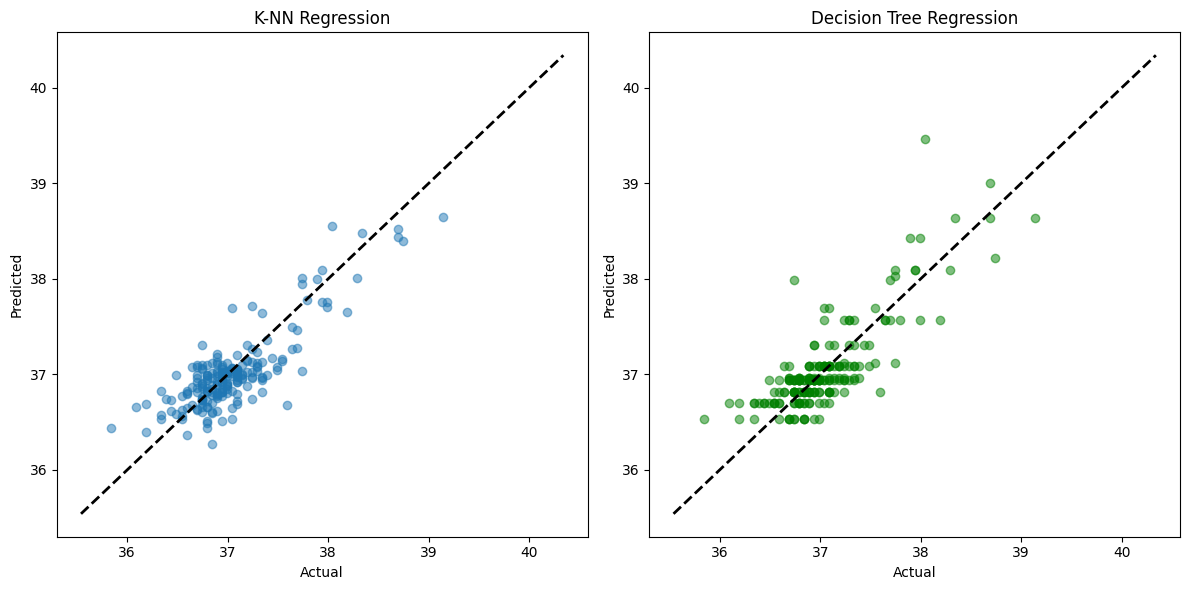

In [10]:
# Visualisasi
plt.figure(figsize=(12, 6))

# K-NN
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('K-NN Regression')

# Decision Tree
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_dtree, alpha=0.5, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regression')

plt.tight_layout()
plt.show()

# Penjelasan Model Matematis

### 1. **Mean Squared Error (MSE)**
MSE mengukur rata-rata dari kuadrat selisih antara nilai aktual dan prediksi. Tujuan utama dari MSE adalah untuk memberikan penalti yang lebih besar terhadap kesalahan prediksi yang lebih besar. Rumus untuk menghitung MSE adalah:

\[
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
\]

**Proses:**
- Menghitung selisih (error) antara nilai aktual dan prediksi untuk setiap data point.
- Mengkuadratkan error tersebut untuk menghilangkan tanda negatif dan memberi penalti yang lebih besar pada kesalahan yang besar.
- Merata-ratakan hasil kuadrat error dari semua data.

### 2. **Root Mean Squared Error (RMSE)**
RMSE adalah akar kuadrat dari MSE. RMSE mengembalikan skala error ke unit asli data (karena MSE dalam satuan kuadrat). Ini membuat RMSE lebih mudah untuk diinterpretasikan karena satuannya sama dengan variabel target.

\[
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
\]

### 3. **R-Squared (Koefisien Determinasi)**
R-Squared mengukur seberapa baik model dapat menjelaskan variasi dalam data target. Nilai R² berkisar antara 0 hingga 1, dengan nilai yang lebih tinggi menunjukkan bahwa model lebih baik dalam menjelaskan variasi data.

\[
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
\]

Dimana:
- \( y_i \) adalah nilai aktual,
- \( \hat{y}_i \) adalah nilai prediksi,
- \( \bar{y} \) adalah rata-rata dari nilai aktual.

---

## **Perbandingan Antara K-NN dan Decision Tree**

| Metrik       | K-NN      | Decision Tree |
|--------------|-----------|---------------|
| **MSE**      | 0.0648    | 0.0795        |
| **RMSE**     | 0.2545    | 0.2820        |
| **R²**       | 69.24%    | 62.22%        |

### **Analisis K-NN (Hasil Lebih Baik)**
1. **MSE 0.0648 dan RMSE 0.2545:**  
   Error prediksi rata-rata sekitar 0.25 unit dari nilai sebenarnya. MSE yang lebih kecil menunjukkan prediksi yang lebih akurat dibandingkan dengan model lain.
   
2. **R-Squared 69.24%:**  
   Model ini menjelaskan 69.24% variasi data target, yang merupakan hasil yang cukup baik dalam banyak kasus dunia nyata. Namun, masih ada 30.76% variasi yang tidak dijelaskan oleh model.

### **Analisis Decision Tree**
1. **MSE 0.0795 dan RMSE 0.2820:**  
   Error sedikit lebih besar dibandingkan dengan K-NN. RMSE untuk Decision Tree lebih tinggi, yang menunjukkan performa yang sedikit lebih buruk dibandingkan dengan K-NN.
   
2. **R-Squared 62.22%:**  
   Model ini menjelaskan 62.22% variasi data target, lebih rendah sekitar 7% dibandingkan dengan K-NN. Meskipun demikian, masih tergolong model yang cukup informatif.
